In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from util import Candidate
from predictor import *

dates = ['20120411', '20160413', '20200415', '20240410']

In [2]:
data: list[dict[dict[list[Candidate]]]] = []

for date in dates:
    election_file = open(f'election_data\\{date}-district.csv', 'r')
    election_data = {}
    party_set = set()

    for line in election_file:
        row = {}

        line = line.split(',')
        city = line[0]
        district_name = line[1].strip()

        election_data.setdefault(city, {})

        idx = 2
        results = []

        while idx < len(line):
            party, name, votes = line[idx:idx+3]
            votes = float(votes)

            results.append(Candidate(party, name, votes))
            idx += 3

        election_data[city][district_name] = results
        if date == dates[0]:
            continue
    
    data.append(election_data)

[6.333333333333333, 2.8, 0, 7.0, 0, 7.0, 5.25, 2.0, 0, 5.0, 0.0, 0, 4.0, 8.0, 0, 0, 6.6, 0, 4.5, 0, 3.0, 0, 0, 5.0, 5.25, 0.0, 5.0, 5.0, 0, 6.0, 0, 0, 0, 5.0, 4.5, 6.666666666666667, -5.0, -2.333333333333333, 4.0, 0, 0, 7.0, 5.0, 0.0, 0, 0, 4.0, 8.0, 7.0, 0, 0, 5.0, 0, 0.0, 7.0, -8.0, 0, 5.0, 4.6, 0, 3.0, 0, 0, -5.0, -5.0, 2.833333333333333, -2.6666666666666665, 5.5, -3.0, 6.285714285714286, 0, 0, 3.0, 0.3333333333333333, 0, 3.0, 0, 0, 0, 2.571428571428572, 4.6, 3.875, 0, 0, 6.0, -5.0, 5.6, 0, 0, 0, -1.0, 0, 5.0, 1.1666666666666667, 5.25, 4.25, 0, 0, 0, 0, 0, 0, 5.0, 0.0, 0.0, 5.333333333333333, 1.0, 4.0, 0.0, 0.0, 5.0, 3.5, -1.0, 0.0, 5.0, 0.0, 3.0, 0.0, -5.0, 6.0, 5.5, -10.0, 0.0, 6.0, 0.0, 0.0, 5.0, 6.0, 0, 2.8, 5.6, 0, 0, 3.0, 1.6, 3.25, 4.666666666666667, -5.0, 0, 0, 3.0, 7.2, 0, 0, 4.0, -3.0, 0, 0, 0, 0.0, 5.0, 6.0, -1.0, -1.75, 3.333333333333333, 3.2, 3.0, -0.5, 6.0, 2.25, 1.0, 2.0, 7.0, 2.2, 2.0, -5.0, 0.6666666666666666, 5.0, 0, 4.0, 1.7142857142857142, -0.375, 0.75, 0.8333333

(array([  1.,   0.,   3.,  11.,  11.,  45.,  27.,  25.,  37.,  51., 297.,
        104., 126., 184., 217., 329., 437., 123.,  42.,  21.]),
 array([-10.        ,  -9.05555556,  -8.11111111,  -7.16666667,
         -6.22222222,  -5.27777778,  -4.33333333,  -3.38888889,
         -2.44444444,  -1.5       ,  -0.55555556,   0.38888889,
          1.33333333,   2.27777778,   3.22222222,   4.16666667,
          5.11111111,   6.05555556,   7.        ,   7.94444444,
          8.88888889]),
 <BarContainer object of 20 artists>)

C:\Users\BarkNMeow\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\BarkNMeow\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


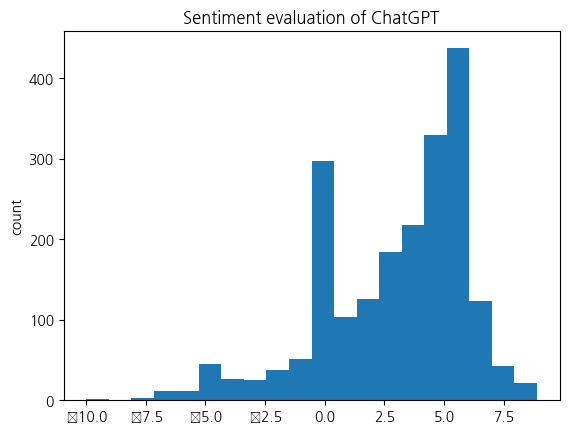

In [24]:
from os import listdir
from os.path import isfile, join

onlyfiles = [f for f in listdir('sentiment_google\\') if isfile(join('sentiment_google\\', f))]

w = []
for f_dir in onlyfiles:
    df = pd.read_csv('sentiment_google\\' + f_dir)
    column = df.columns

    for idx, row in df.iterrows():
        for i in range(1, len(column) - 1, 2):
            if row[i - 1] == 0:
                continue

            if row[i] >= 10:
                continue

            w.append(row[i])

print(w)
plt.title('Sentiment evaluation of ChatGPT')
plt.ylabel('count')
plt.hist(w, bins=20)

2728


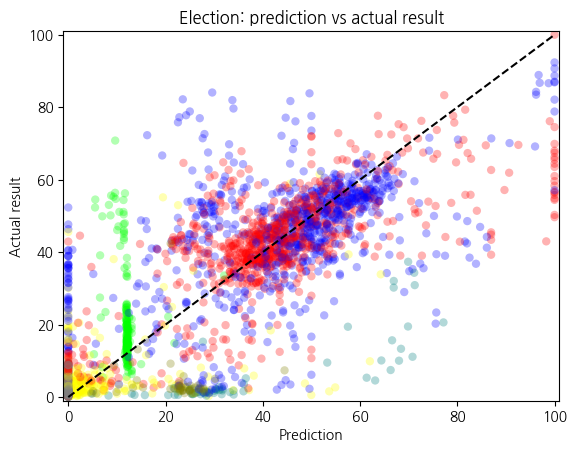

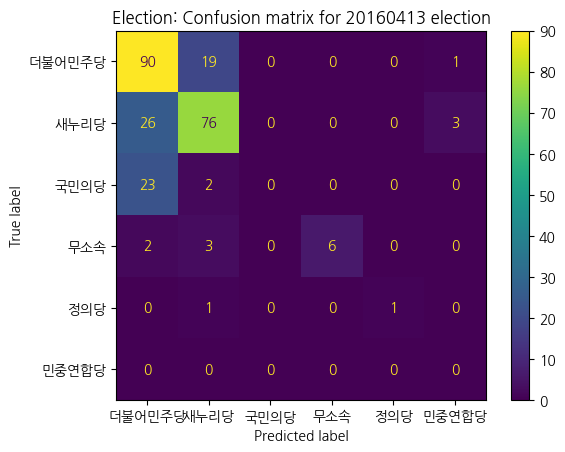

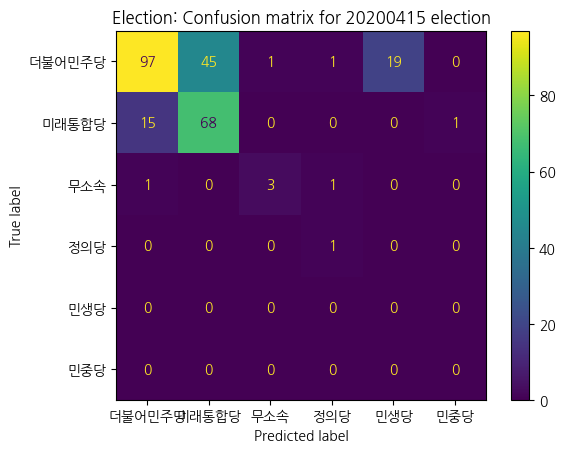

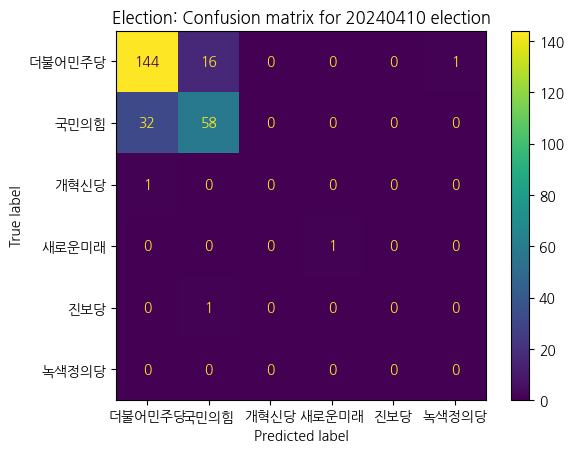

In [3]:
base_model = PrevVotePredictor(data, dates, 'Election')
base_model.draw_scatter_plot()

for d_i in range(1, len(dates)):
    base_model.draw_confusion_matrix(d_i)

In [4]:
# lr_base_model = LRPredictor(data, dates, 'ETS', param=['prev_vote', 'trend', 'sentiment'])
# lr_base_model.train()
# lr_base_model.draw_scatter_plot()

# for d_i in range(1, len(dates)):
#     lr_base_model.draw_confusion_matrix(d_i)

2728


C:\Users\BarkNMeow\AppData\Roaming\Python\Python310\site-packages\numpy\ma\core.py:2826: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


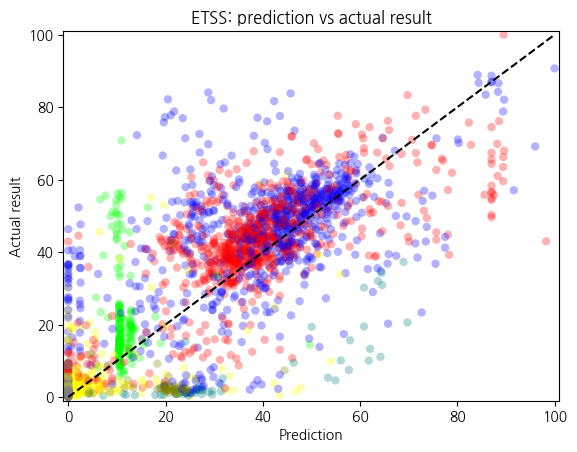

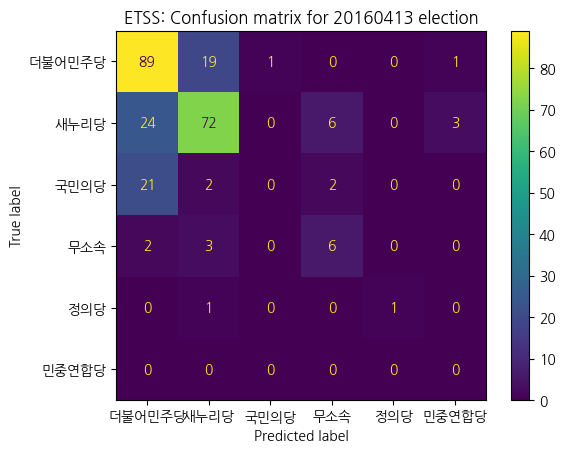

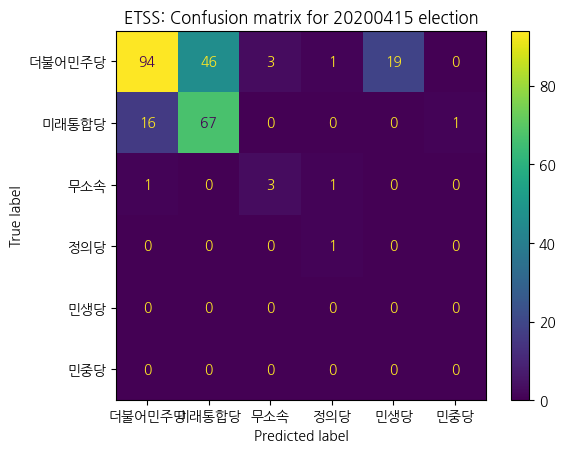

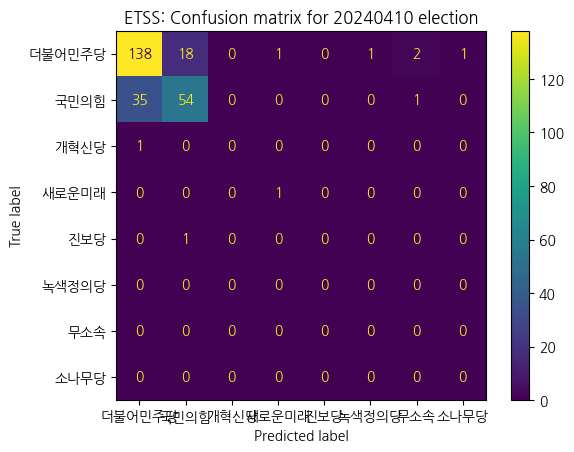

[0.87039611 0.1193061  0.00176336 0.01212311]


In [5]:
lr_np_sentiment_model = LRPredictor(data, dates, 'ETSS', param=['prev_vote', 'trend', 'neg_sentiment', 'pos_sentiment'])
lr_np_sentiment_model.train()
lr_np_sentiment_model.draw_scatter_plot()

for d_i in range(1, len(dates)):
    lr_np_sentiment_model.draw_confusion_matrix(d_i)

print(lr_np_sentiment_model.get_coeff())

2728


C:\Users\BarkNMeow\AppData\Roaming\Python\Python310\site-packages\numpy\ma\core.py:2826: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


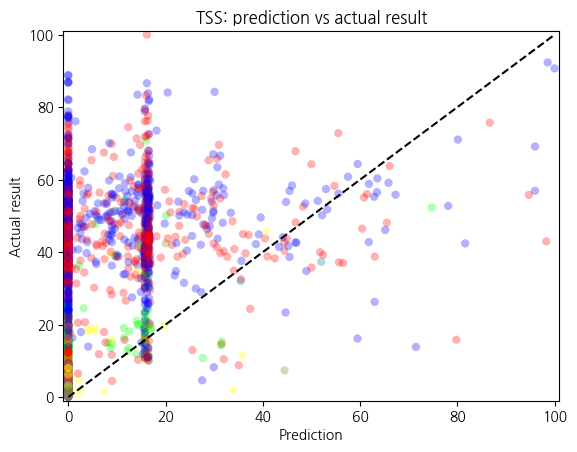

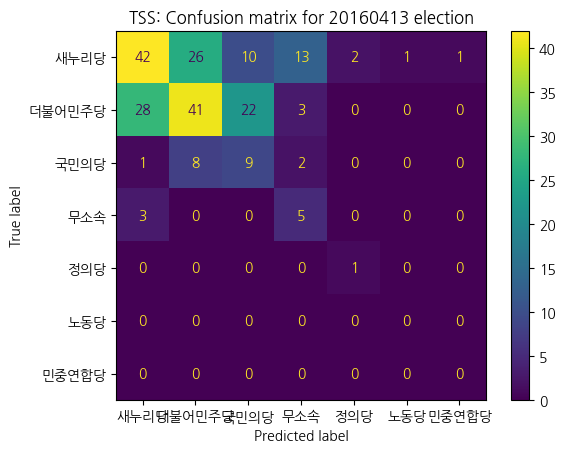

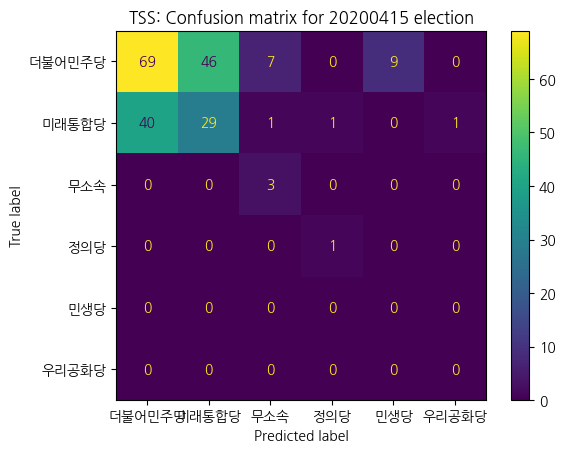

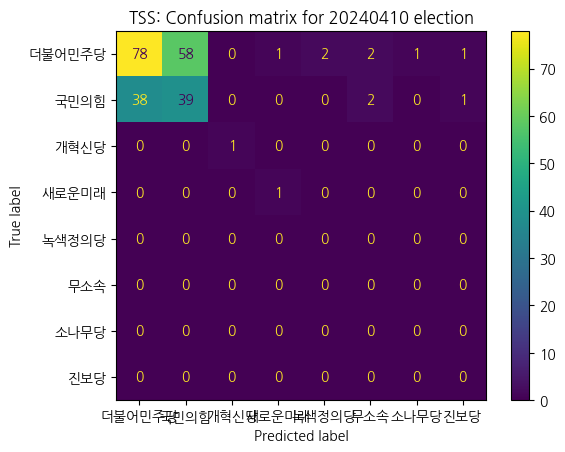

[0.78840323 0.00672817 0.06807292]


In [6]:
lr_novote_model = LRPredictor(data, dates, 'TSS', param=['trend', 'neg_sentiment', 'pos_sentiment'])
lr_novote_model.train()
lr_novote_model.draw_scatter_plot()

for d_i in range(1, len(dates)):
    lr_novote_model.draw_confusion_matrix(d_i)

print(lr_novote_model.get_coeff())